In [123]:
import pandas as pd

train_df = pd.read_csv('data/disease_train.csv')
test_df = pd.read_csv('data/disease_public_test.csv')
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,2.0,2.0,29.4,84.0,2.0,75.0,5.78,0
1,1.0,2.0,33.5,101.0,2.0,64.0,8.74,0
2,1.0,2.0,29.2,101.0,2.0,80.0,9.72,0
3,1.0,2.0,28.7,121.0,2.0,146.0,3.83,0
4,1.0,1.0,25.6,87.0,2.0,82.0,13.90,0


In [124]:
target = 'Y'

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1595 non-null   float64
 1   X2      1595 non-null   float64
 2   X3      1595 non-null   float64
 3   X4      1595 non-null   float64
 4   X5      1595 non-null   float64
 5   X6      1595 non-null   float64
 6   X7      1595 non-null   float64
 7   Y       1595 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 99.8 KB


In [126]:
train_df.describe()

,X1,X2,X3,X4,X5,X6,X7,Y
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,1.503448,1.820063,28.102320,99.715361,2.020690,115.754232,11.955455,0.160502
std,0.500145,0.408011,7.307291,17.035404,0.194526,47.079751,9.719597,0.367186
min,1.000000,1.000000,14.600000,63.000000,1.000000,40.000000,0.140000,0.000000
25%,1.000000,2.000000,23.000000,92.000000,2.000000,88.000000,5.810000,0.000000
50%,2.000000,2.000000,27.000000,97.000000,2.000000,106.000000,9.090000,0.000000
75%,2.000000,2.000000,31.500000,104.000000,2.000000,131.000000,14.570000,0.000000
max,2.000000,7.000000,70.100000,368.000000,3.000000,503.000000,81.790000,1.000000


In [127]:
train_df[target].value_counts(normalize=True) # Классы несбалансированны

Y
0    0.839498
1    0.160502
Name: proportion, dtype: float64

## Eda

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



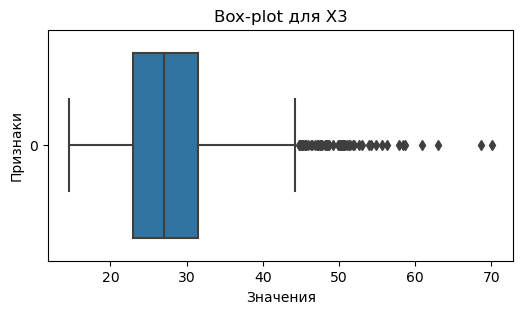

c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


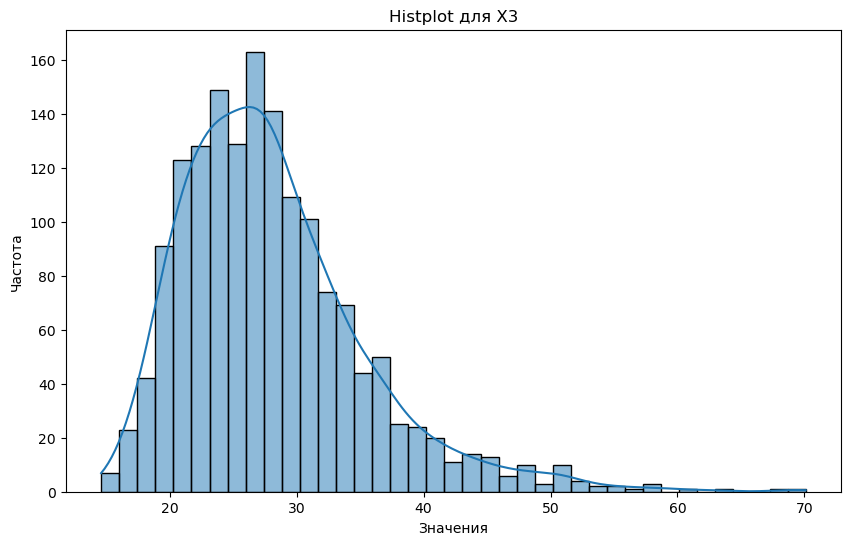

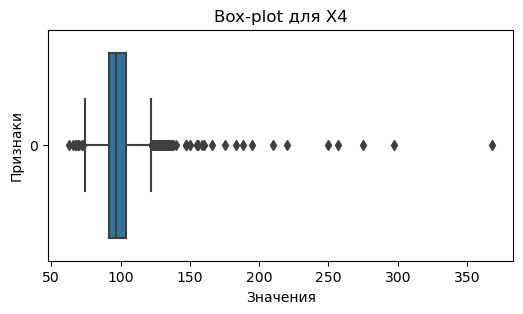

c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


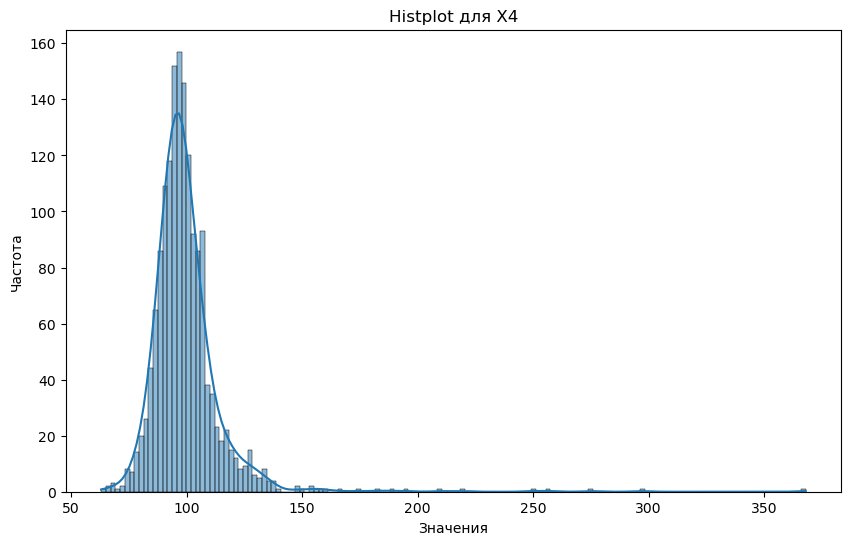

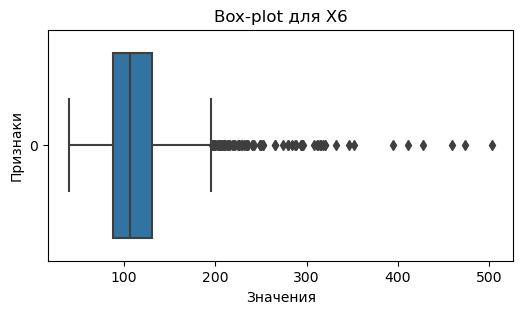

c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


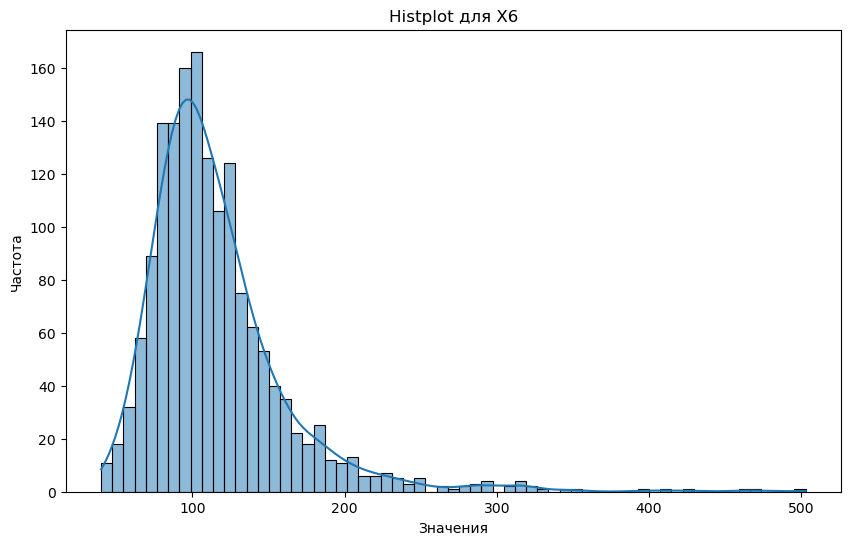

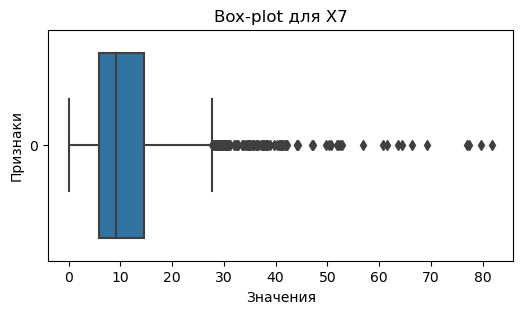

c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


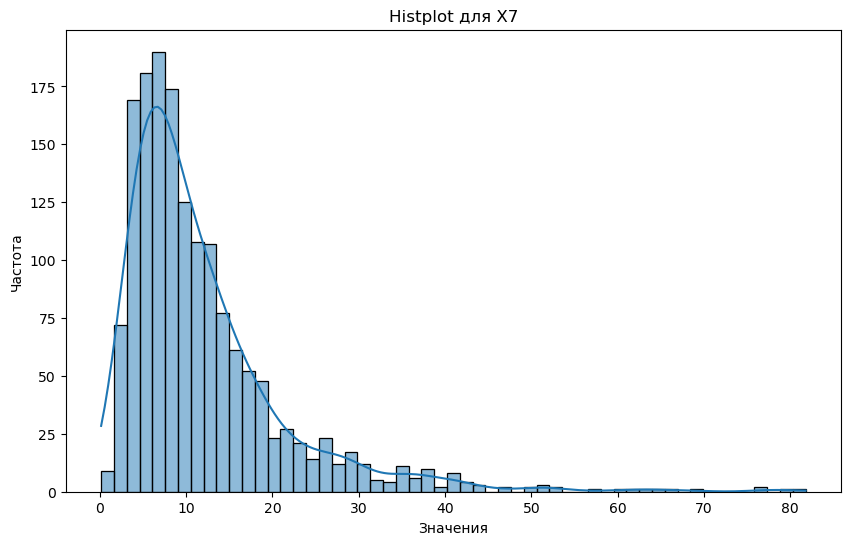

In [129]:

numerical_columns = ['X3', 'X4', "X6", "X7"]
cat_columns = ['X1', 'X2', "X5"]
train_df[numerical_columns]

def plot_boxplot(data, title):
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=data, orient='h')
    plt.title(f'Box-plot для {title}')
    plt.xlabel('Значения')
    plt.ylabel('Признаки')
    plt.show()

def plot_histplot(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, kde=True)
    plt.title(f'Histplot для {title}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.show()



for col in numerical_columns:
    plot_boxplot(train_df[col], col)
    plot_histplot(train_df[col], col)

In [130]:
for col in cat_columns:
    display(train_df[train_df["Y"] == 1][col].value_counts(normalize=True))
    display(train_df[train_df["Y"] == 0][col].value_counts(normalize=True))

X1
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

X1
2.0    0.504108
1.0    0.495892
Name: proportion, dtype: float64

X2
2.0    0.910156
1.0    0.089844
Name: proportion, dtype: float64

X2
2.0    0.798357
1.0    0.200896
7.0    0.000747
Name: proportion, dtype: float64

X5
2.0    0.917969
3.0    0.062500
1.0    0.019531
Name: proportion, dtype: float64

X5
2.0    0.970127
3.0    0.023152
1.0    0.006721
Name: proportion, dtype: float64

In [131]:
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [132]:
# for col in cat_columns:
#     train_df[col] = train_df[col].astype('str')
    

In [133]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1595 non-null   float64
 1   X2      1595 non-null   float64
 2   X3      1595 non-null   float64
 3   X4      1595 non-null   float64
 4   X5      1595 non-null   float64
 5   X6      1595 non-null   float64
 6   X7      1595 non-null   float64
 7   Y       1595 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 99.8 KB


In [134]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(target, axis=1), train_df[target], test_size=0.3, stratify=train_df[target], random_state=42)


y_train.value_counts(normalize=True)

Y
0    0.839606
1    0.160394
Name: proportion, dtype: float64

In [ ]:
import optuna
# Определение функции для подбора гиперпараметров
def objective(trial):
    # Определение гиперпараметров
    iterations = trial.suggest_int('iterations', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    depth = trial.suggest_int('depth', 2, 7)
    

    # Создание модели CatBoost
    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        verbose=100,
    )

    # Обучение модели
    train_pool = Pool(X_train, y_train)
    model.fit(train_pool)

    # Оценка модели на тестовой выборке
    test_pool = Pool(X_test, y_test)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    # Возвращение значения метрики
    return score.mean()  # Минимизируем ошибку, поэтому возвращаем отрицательное значение

# Создание Optuna study
study = optuna.create_study(direction='maximize')

# Запуск подбора гиперпараметров
study.optimize(objective, n_trials=20)

# Вывод лучших гиперпараметров
print("Best parameters:", study.best_params)
print("Best value:", study.best_value)

In [136]:
params = {'iterations': 370, 'learning_rate': 0.322674350028691, 'depth': 5}
model = CatBoostClassifier(
    verbose=200,
    #eval_metric='F1',
    #depth=3,
    **params
    
)
train_pool = Pool(X_train, y_train)#, cat_features=np.array(cat_columns))
model.fit(train_pool, plot=True)

# Make predictions on the test set
test_pool = Pool(X_test, y_test)#, cat_features=np.array(cat_columns))
y_preds = model.predict(test_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5233173	total: 5.09ms	remaining: 1.88s
200:	learn: 0.0448115	total: 812ms	remaining: 683ms
369:	learn: 0.0188111	total: 1.5s	remaining: 0us


In [138]:
f1_macro = f1_score(y_test, y_preds, average='macro')
print("F1-macro score:", f1_macro)

F1-macro score: 0.6070474664224664


In [193]:
import lightgbm as lgb

params = {
    'objective': 'binary',
    'metric': 'f1',
    
}

# Создание объектов Dataset для обучения и тестирования модели
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Тренировка модели с использованием wandb_callback
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

[LightGBM] [Info] Number of positive: 179, number of negative: 937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 1116, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160394 -> initscore=-1.655297
[LightGBM] [Info] Start training from score -1.655297


In [194]:
y_pred_class = (y_pred > 0.5).astype(int)
f1_macro = f1_score(y_test, y_pred_class, average='macro')
print("F1-macro score:", f1_macro)

F1-macro score: 0.6148913640285513


In [189]:
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'objective': 'binary',
        'metric': 'f1',
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        'learning_rate': trial.suggest_float ('learning_rate', 0.01, 0.5),
        'feature_fraction': trial.suggest_float ('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float ('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 5),
        'verbose': -1
    }

    # Train the LightGBM model
    scores = cross_val_score(lgb.LGBMClassifier(**params), X_train, y_train, cv=5, scoring='f1_macro')
    # Evaluate the model on the testing set

    # Return the negative F1 score (since we want to maximize it)
    return -scores.mean()

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Run the hyperparameter tuning
study.optimize(objective, n_trials=30)

# Print the best hyperparameters and the best F1 score
print("Best parameters:", study.best_params)
print("Best F1 score:", -study.best_value)

[I 2024-05-14 16:32:34,047] A new study created in memory with name: no-name-6e4b3d05-b887-46df-8841-08d3e8a96579
[I 2024-05-14 16:32:34,804] Trial 0 finished with value: -0.6005884685977251 and parameters: {'num_leaves': 111, 'learning_rate': 0.1817613005670548, 'feature_fraction': 0.5223806260217666, 'bagging_fraction': 0.7907294799351281, 'bagging_freq': 5}. Best is trial 0 with value: -0.6005884685977251.
[I 2024-05-14 16:32:35,286] Trial 1 finished with value: -0.5922231829293577 and parameters: {'num_leaves': 85, 'learning_rate': 0.474946017995304, 'feature_fraction': 0.5723667998067334, 'bagging_fraction': 0.5486621975115558, 'bagging_freq': 3}. Best is trial 0 with value: -0.6005884685977251.
[I 2024-05-14 16:32:35,826] Trial 2 finished with value: -0.5763504052287985 and parameters: {'num_leaves': 125, 'learning_rate': 0.06988342841057285, 'feature_fraction': 0.7326415152141941, 'bagging_fraction': 0.6238186642475505, 'bagging_freq': 4}. Best is trial 0 with value: -0.60058846

Best parameters: {'num_leaves': 31, 'learning_rate': 0.3192182241218504, 'feature_fraction': 0.5961561349532939, 'bagging_fraction': 0.8075324994988053, 'bagging_freq': 2}
Best F1 score: 0.605907968274869
